In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

## Question to be asked about the Data:
-What's the business objective that requires a cognitive solution?

-What are the acceptable parameters for accuracy, precision and confusion matrix values?

-What are the expected inputs to the model and the expected outputs?

-What are the characteristics of the problem being solved? Is this a classification, regression or clustering problem?

-How will the benefits of the model be measured?
- All columns vs Target
- Distribution data of all columns
- What are the three most important things we need to focus on in data
-What are the  most effective features that affect data
-


In [46]:
df = pd.read_csv('survey.csv')

In [47]:
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [48]:
df.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [49]:
df = df[(df['Age'] < 100) & (df['Age'] > 17)]
the_occupier = "Israel"
df = df[df['Country'] != the_occupier]

In [50]:
(df.isnull().sum()/df.shape[0])*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.850722
self_employed                 1.444623
family_history                0.000000
treatment                     0.000000
work_interfere               20.866774
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

In [51]:
df.dropna(subset=['self_employed'], inplace=True)
df = df.reset_index()

In [52]:
(df.isnull().sum()/df.shape[0])*100

index                         0.000000
Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.879479
self_employed                 0.000000
family_history                0.000000
treatment                     0.000000
work_interfere               21.172638
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical       

In [53]:
df.drop(['index', 'Timestamp'], axis = 1, inplace = True)
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,46,male,United States,MD,Yes,Yes,No,Sometimes,1-5,Yes,...,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes,NaN
1,36,Male,France,NaN,Yes,Yes,No,NaN,6-25,Yes,...,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No,NaN
2,29,Male,United States,NY,No,Yes,Yes,Sometimes,100-500,No,...,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No,NaN
3,31,male,United States,NC,Yes,No,No,Never,1-5,Yes,...,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No,NaN
4,46,Male,United States,MA,No,No,Yes,Often,26-100,Yes,...,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1224,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1225,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1226,46,f,United States,NC,No,No,No,NaN,100-500,Yes,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [54]:
df.Gender.unique()

array(['male', 'Male', 'Female', 'female', 'M', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [55]:
male = ['male', 'Male', 'M', 'm', 'Male-ish', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make','Male ', 'Man', 'msle', 'Mail', 'cis male', 'Malr', 'Cis Man']
female = ['Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ', 'cis-female/femme', 'Female (cis)', 'femail']
other = ['Trans-female', 'something kinda male?', 'queer/she/they', 'non-binary', 'Nah', 'All', 'Enby', 'fluid', 'Genderqueer', 'Androgyne', 'Agender', 'Guy (-ish) ^_^', 'male leaning androgynous', 'Trans woman', 'Neuter', 'Female (trans)', 'queer', 'ostensibly male, unsure what that really means']
dropped = ['A little about you', 'p']

In [56]:
df = df[(df['Gender'] != 'A little about you') & (df['Gender'] != 'p')]

In [57]:
df.replace(to_replace = male, value = 'male', inplace = True)
df.replace(to_replace = female, value = 'female', inplace = True)
df.replace(to_replace = other, value = 'other', inplace = True)

# Univariate for categorical data 

In [58]:
def bar_plot(categ_var):
    """
        input: variable ex: "anonymity"
        output: bar plot & value count
    """
    # get feature
    var = df[categ_var]
    # count number of categorical variable
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")

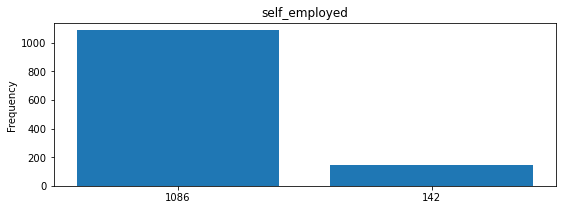

self_employed:
No     1086
Yes     142
Name: self_employed, dtype: int64


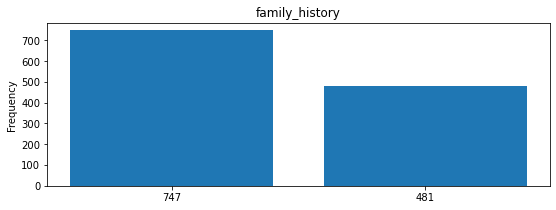

family_history:
No     747
Yes    481
Name: family_history, dtype: int64


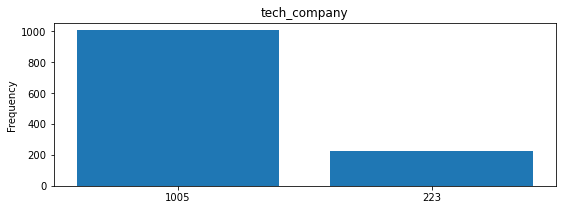

tech_company:
Yes    1005
No      223
Name: tech_company, dtype: int64


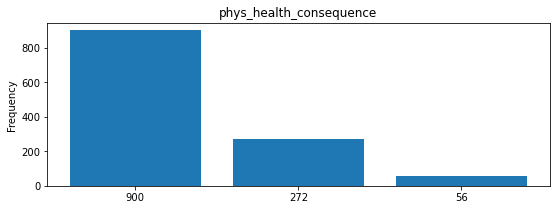

phys_health_consequence:
No       900
Maybe    272
Yes       56
Name: phys_health_consequence, dtype: int64


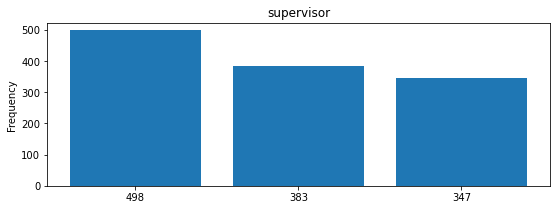

supervisor:
Yes             498
No              383
Some of them    347
Name: supervisor, dtype: int64


In [59]:
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor"]
for c in categorical_vars:
    bar_plot(c)

# Univariate Charts

<AxesSubplot:xlabel='state', ylabel='count'>

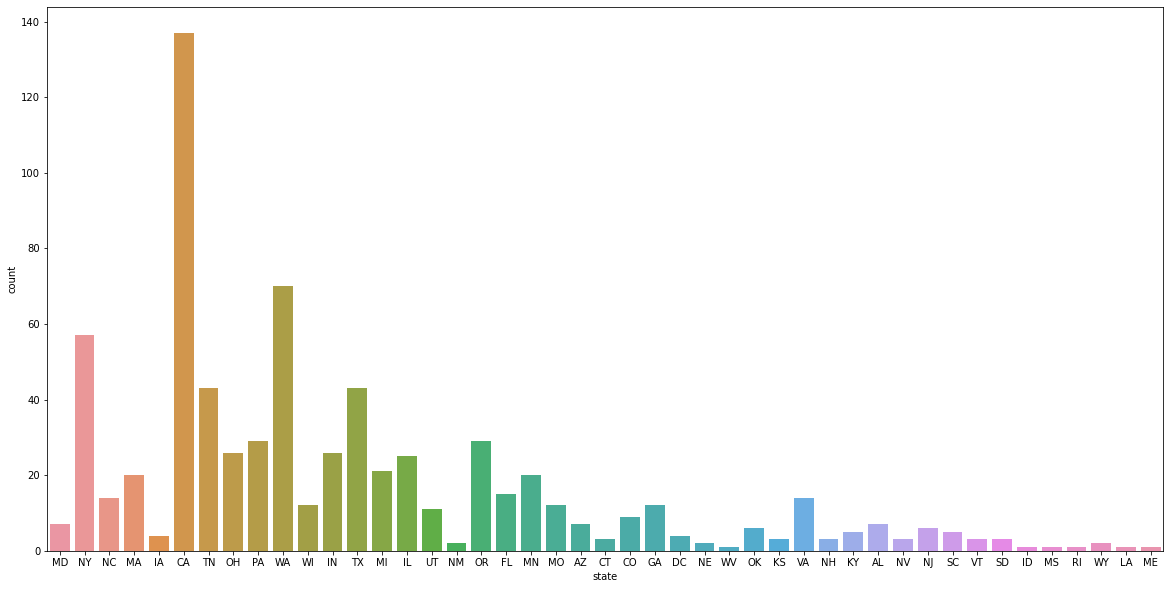

In [60]:
plt.subplots(figsize=(20, 10))
sns.countplot(x = df['state'])

In [61]:
#plt.figure(figsize=(12,7))
#sns.histplot(data=df ,x='work_interfere');
#plt.title('work_interfere',fontweight='bold')
#plt.xlabel('work_interfere',fontweight='bold')
#plt.ylabel('count',fontweight='bold')

<AxesSubplot:xlabel='no_employees', ylabel='count'>

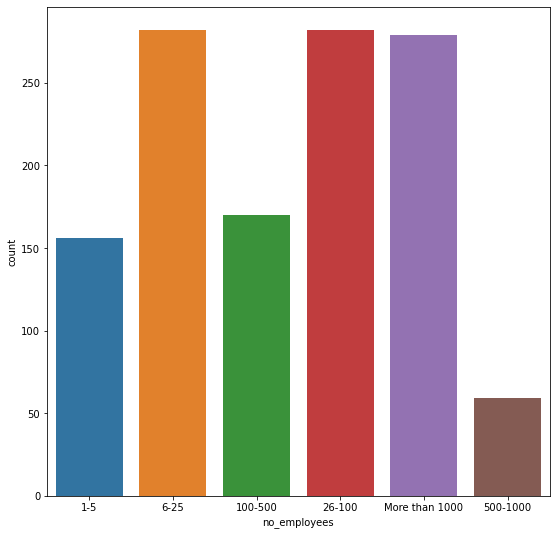

In [18]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['no_employees'])

<AxesSubplot:xlabel='seek_help', ylabel='count'>

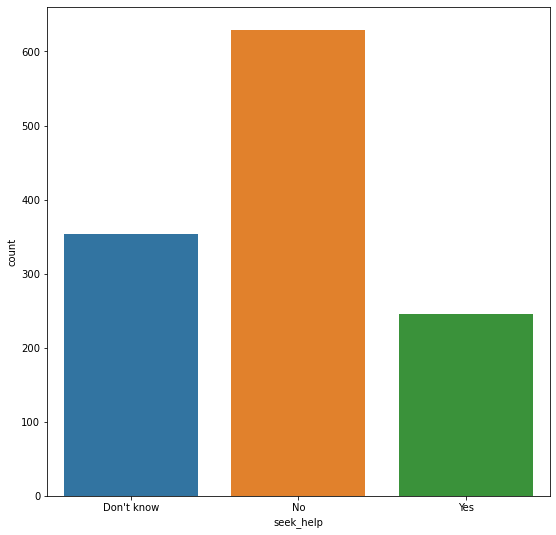

In [19]:
plt.figure(figsize=(9,9))
sns.countplot(data=df, x='seek_help')

<AxesSubplot:xlabel='care_options', ylabel='count'>

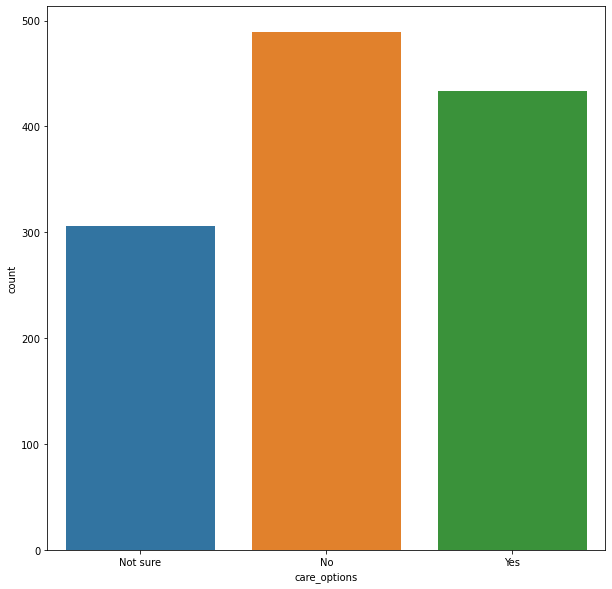

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(data=df, x='care_options')

<AxesSubplot:xlabel='leave', ylabel='count'>

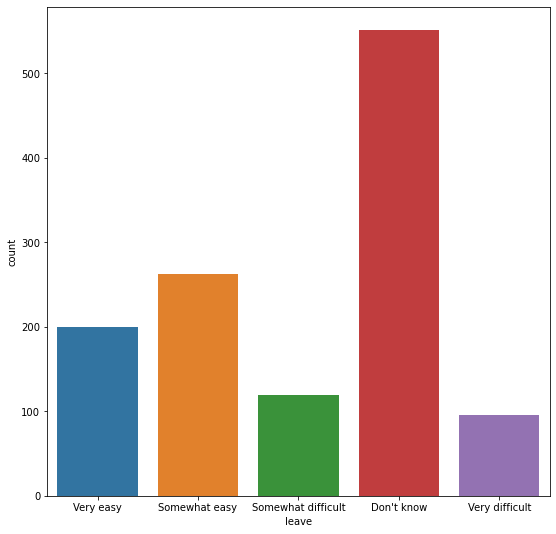

In [21]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['leave'])

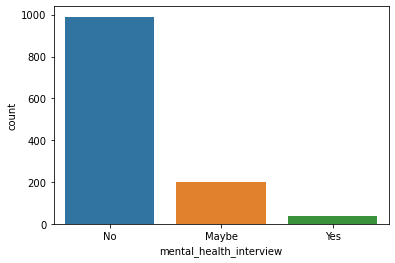

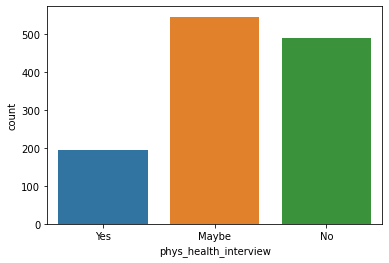

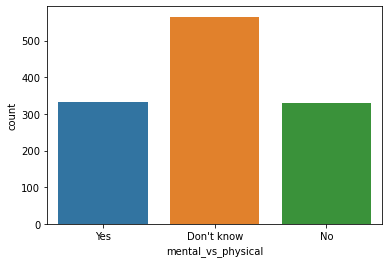

In [22]:
k=['mental_health_interview','phys_health_interview','mental_vs_physical']
for i in k:
    sns.countplot(x = df[i])
    plt.show()

<AxesSubplot:xlabel='Gender', ylabel='count'>

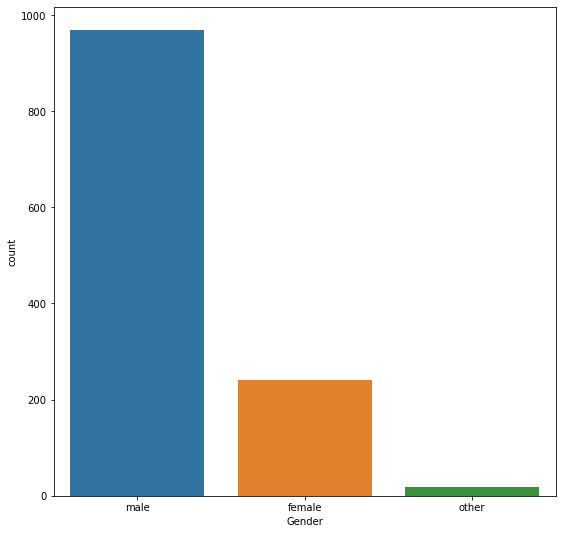

In [23]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['Gender'])

<AxesSubplot:xlabel='remote_work', ylabel='count'>

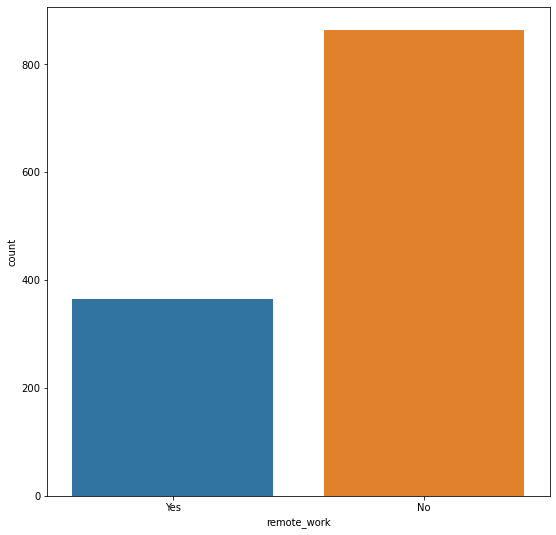

In [24]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['remote_work'])

<AxesSubplot:xlabel='benefits', ylabel='count'>

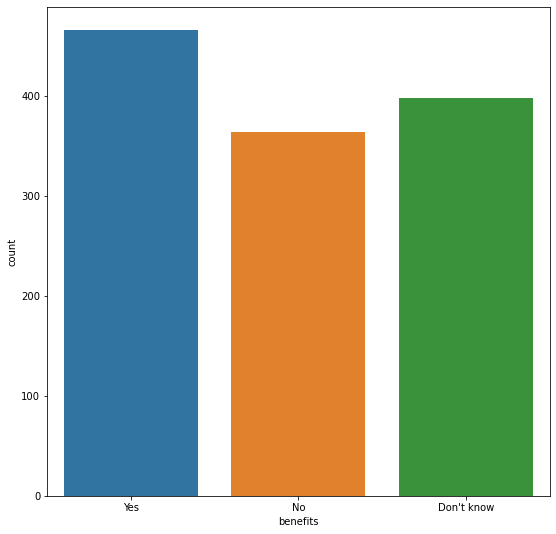

In [25]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['benefits'])

<AxesSubplot:xlabel='wellness_program', ylabel='count'>

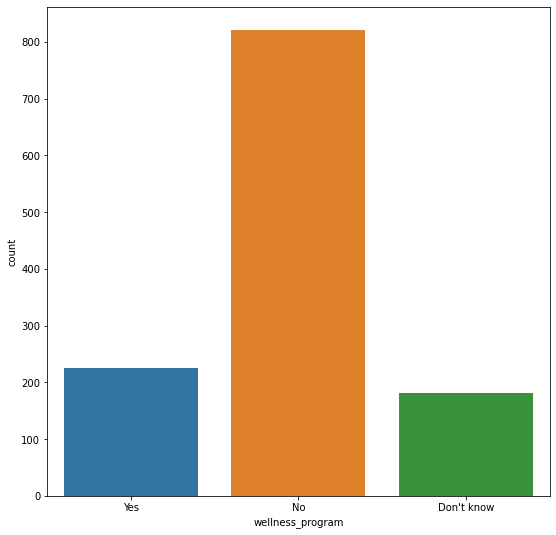

In [26]:
plt.figure(figsize=(9,9))
sns.countplot(x = df['wellness_program'])

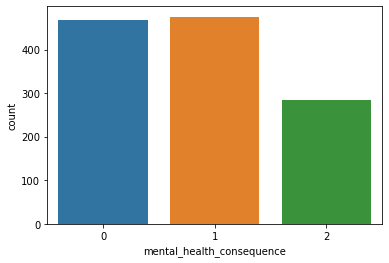

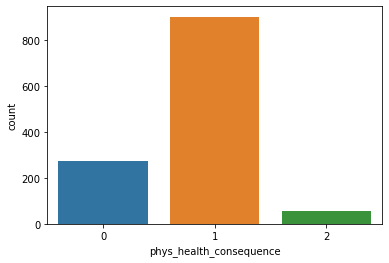

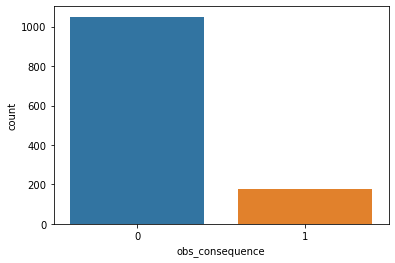

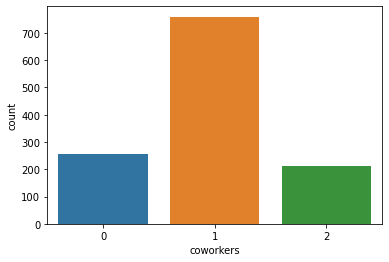

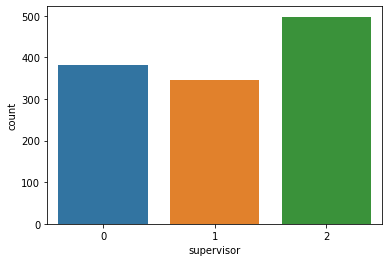

In [196]:
s=['mental_health_consequence','phys_health_consequence','obs_consequence','coworkers','supervisor']
for i in s:
    sns.countplot(x = df[i])
    plt.show()

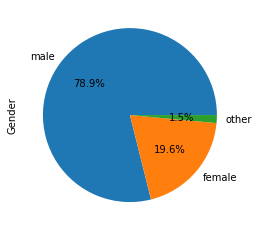

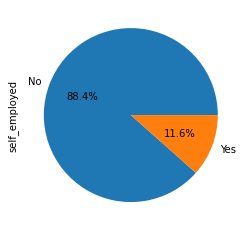

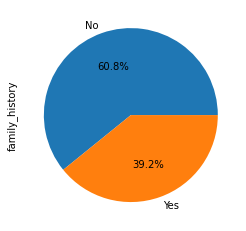

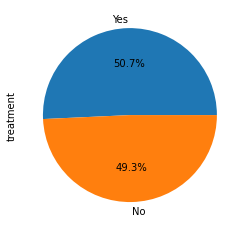

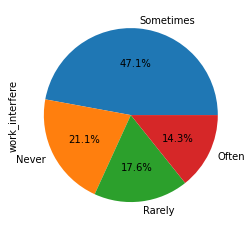

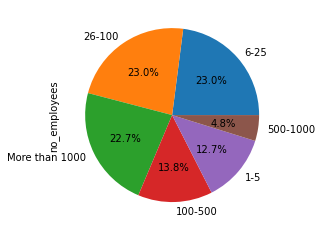

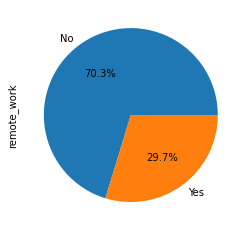

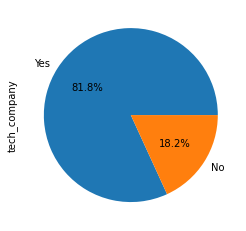

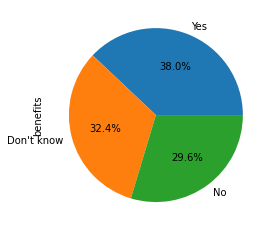

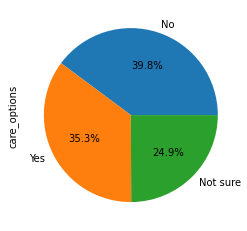

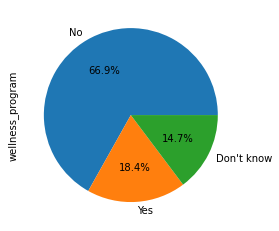

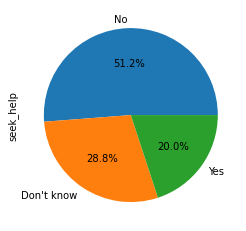

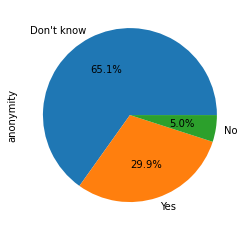

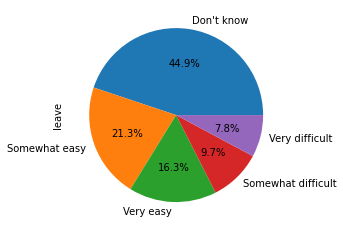

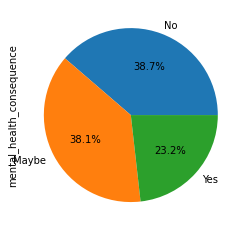

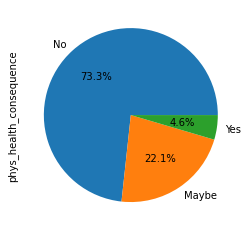

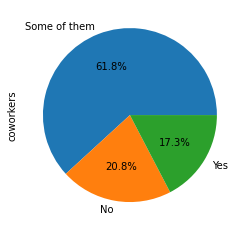

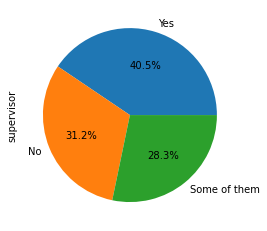

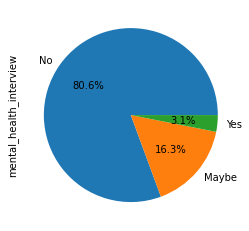

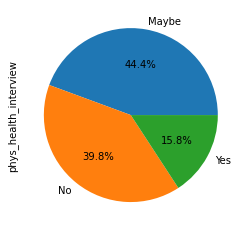

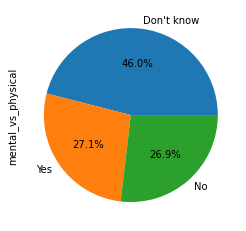

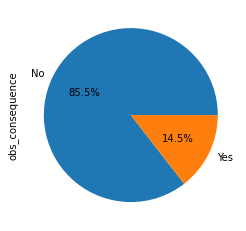

In [27]:
c = ["Gender","self_employed","family_history","treatment","work_interfere","no_employees","remote_work","tech_company","benefits","care_options","wellness_program","seek_help","anonymity","leave","mental_health_consequence","phys_health_consequence","coworkers","supervisor","mental_health_interview","phys_health_interview","mental_vs_physical","obs_consequence"]
for col in c:
    round(df[col].value_counts()/df.shape[0]*100,2).plot.pie(autopct= '%1.1f%%')
    plt.show()

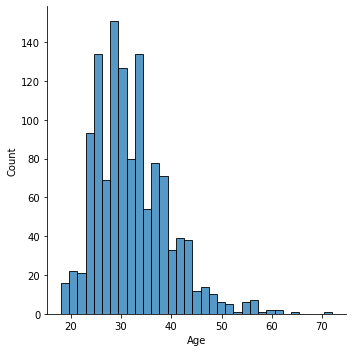

In [28]:
sns.displot(df["Age"])

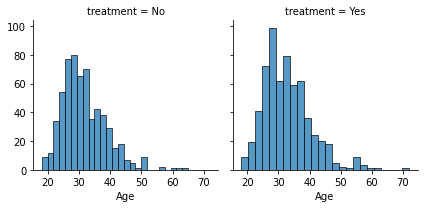

In [29]:
g = sns.FacetGrid(df, col='treatment')
g.map(sns.histplot, "Age")

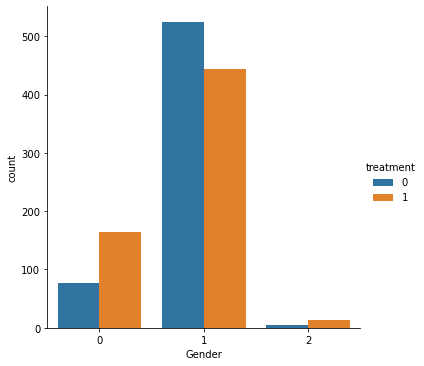

In [200]:
sns.catplot(data=df, kind="count", x="Gender", hue="treatment")

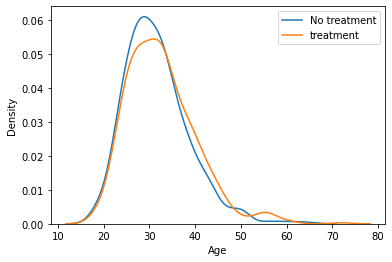

In [30]:
ax = sns.kdeplot(df.Age[(df["treatment"] == 'No') ])
ax = sns.kdeplot(df.Age[(df["treatment"] == 'Yes') ])
ax.legend(["No treatment","treatment"],loc='upper right')

In [63]:
le = LabelEncoder()

In [64]:
df['Gender'] = le.fit_transform(df.Gender.values)

In [65]:
le = LabelEncoder()
df['self_employed'] = le.fit_transform(df.self_employed.values)
le = LabelEncoder()
df['family_history'] = le.fit_transform(df.family_history.values)
le = LabelEncoder()
df['treatment'] = le.fit_transform(df.treatment.values)
le = LabelEncoder()
df['remote_work'] = le.fit_transform(df.remote_work.values)
le = LabelEncoder()
df['tech_company'] = le.fit_transform(df.tech_company.values)
le = LabelEncoder()
df['obs_consequence'] = le.fit_transform(df.obs_consequence.values)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 0 to 1227
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1228 non-null   int64 
 1   Gender                     1228 non-null   int32 
 2   Country                    1228 non-null   object
 3   state                      726 non-null    object
 4   self_employed              1228 non-null   int32 
 5   family_history             1228 non-null   int32 
 6   treatment                  1228 non-null   int32 
 7   work_interfere             968 non-null    object
 8   no_employees               1228 non-null   object
 9   remote_work                1228 non-null   int32 
 10  tech_company               1228 non-null   int32 
 11  benefits                   1228 non-null   object
 12  care_options               1228 non-null   object
 13  wellness_program           1228 non-null   object
 14  seek_hel

In [67]:
columns = ['Country', 'state', 'work_interfere', 'no_employees', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical']
for col in columns:
    le = LabelEncoder()
    df[col] = df[col].astype('str')
    df[col] = le.fit_transform(df[col].values)

<AxesSubplot:>

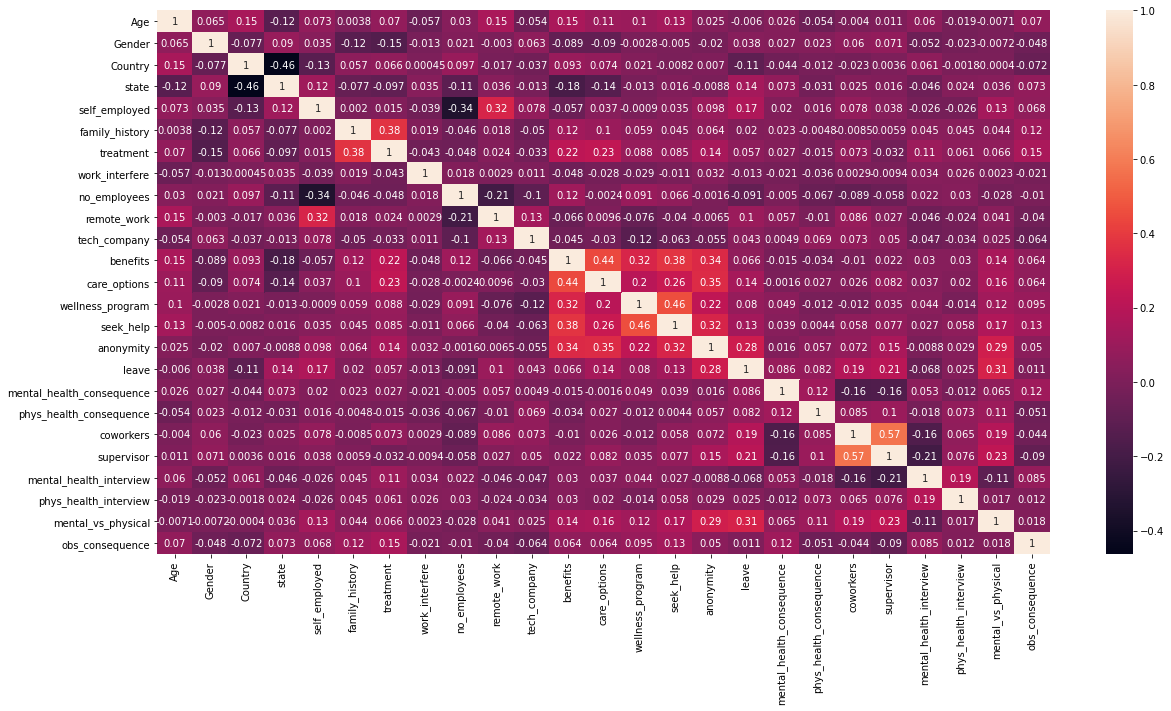

In [68]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), cbar = True, annot=True)

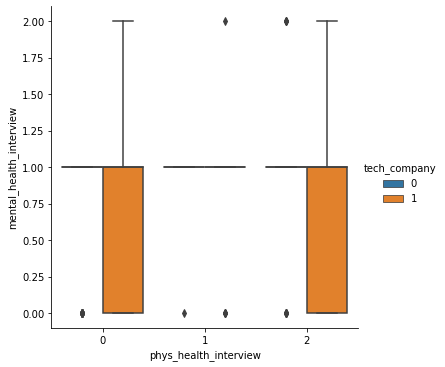

In [39]:
sns.catplot(x = "phys_health_interview", y = "mental_health_interview", hue = "tech_company", data = df, kind="box")

<AxesSubplot:xlabel='wellness_program', ylabel='remote_work'>

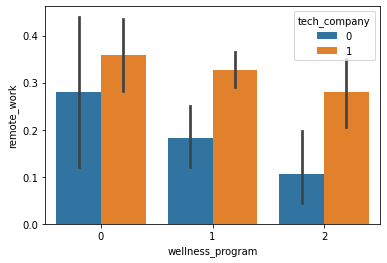

In [44]:
sns.barplot(x = "wellness_program", y = "remote_work", hue = "tech_company", data = df)

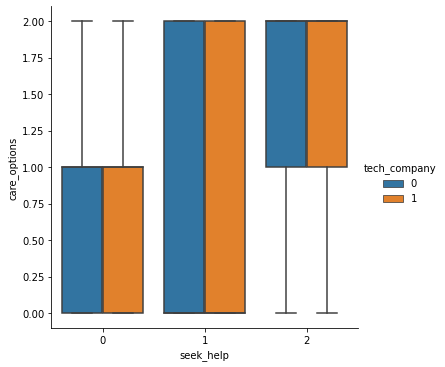

In [41]:
sns.catplot(x = "seek_help", y = "care_options", hue = "tech_company", data = df, kind="box")

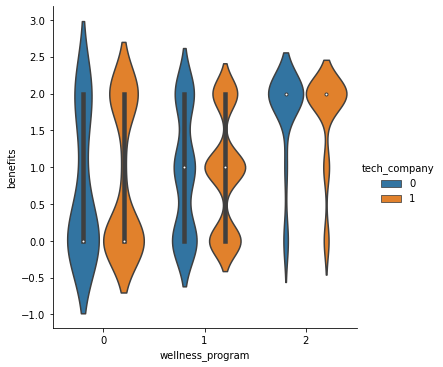

In [42]:
sns.catplot(x = "wellness_program", y = "benefits", hue = "tech_company", data = df, kind="violin")

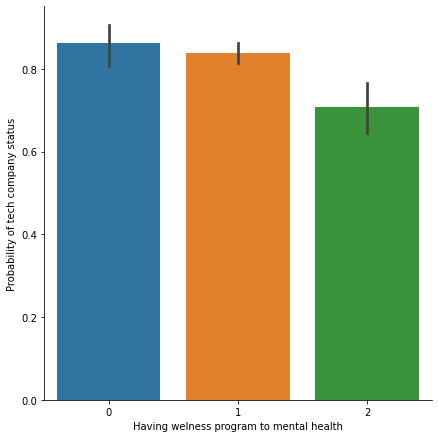

In [43]:
g = sns.catplot(x = "wellness_program", y = "tech_company", data = df, kind = "bar", height = 6)
# How easy is it for you to take medical leave for a mental health condition?
g.set_ylabels("Probability of tech company status")
g.set_xlabels("Having welness program to mental health")
plt.show()

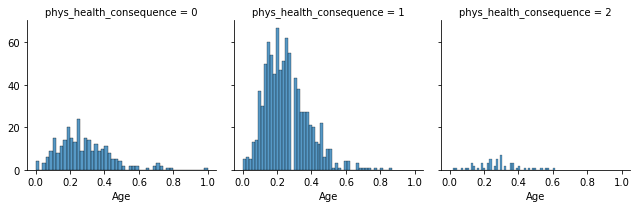

In [207]:
g = sns.FacetGrid(df, col = "phys_health_consequence")
g.map(sns.histplot, "Age", bins = 50)

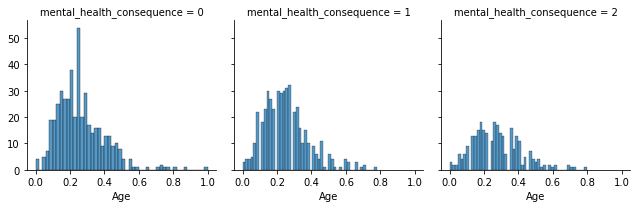

In [208]:
g = sns.FacetGrid(df, col = "mental_health_consequence")
g.map(sns.histplot, "Age", bins = 50)

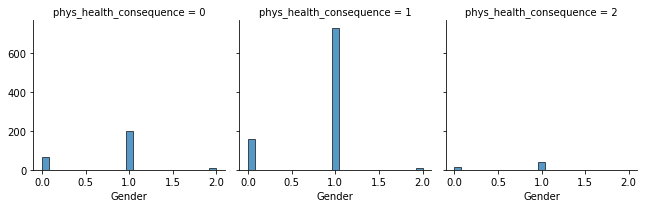

In [209]:
g = sns.FacetGrid(df, col = "phys_health_consequence")
g.map(sns.histplot, "Gender", bins = 25)
g.add_legend()

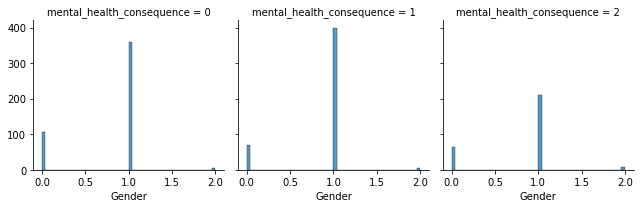

In [210]:
g = sns.FacetGrid(df, col = "mental_health_consequence")
g.map(sns.histplot, "Gender", bins = 50)

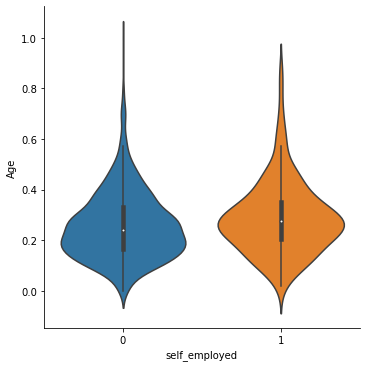

In [211]:
sns.catplot(x = "self_employed", y = "Age", data = df, kind="violin")

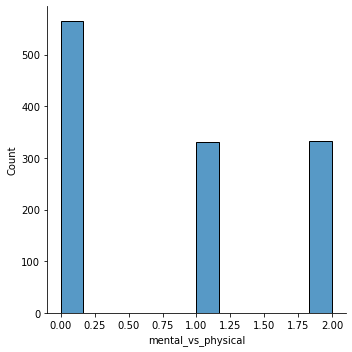

In [212]:
sns.displot(df['mental_vs_physical'])

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'self_employed'}>,
        <AxesSubplot:title={'center':'family_history'}>,
        <AxesSubplot:title={'center':'treatment'}>],
       [<AxesSubplot:title={'center':'work_interfere'}>,
        <AxesSubplot:title={'center':'no_employees'}>,
        <AxesSubplot:title={'center':'remote_work'}>,
        <AxesSubplot:title={'center':'tech_company'}>,
        <AxesSubplot:title={'center':'benefits'}>],
       [<AxesSubplot:title={'center':'care_options'}>,
        <AxesSubplot:title={'center':'wellness_program'}>,
        <AxesSubplot:title={'center':'seek_help'}>,
        <AxesSubplot:title={'center':'anonymity'}>,
        <AxesSubplot:title={'center':'leave'}>],
       [<AxesSubplot:title={'center':'mental_health_consequence'}>,
        <AxesSubplot:title={'center':'phys_health_consequence'}>,
        <AxesSubplot:title={'center':'coworkers'}>,
        <Axes

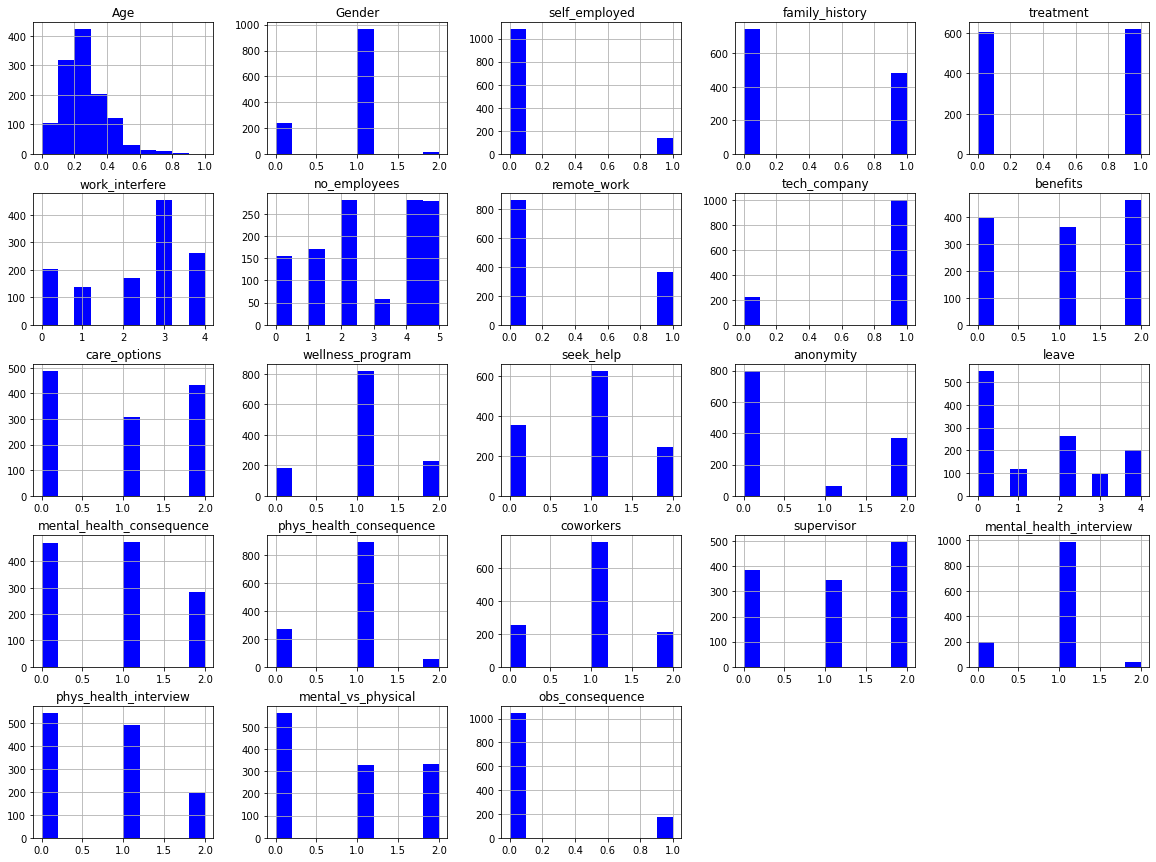

In [213]:
df.hist(bins=10 , figsize=(20,15), color = 'blue')

# Bivariate

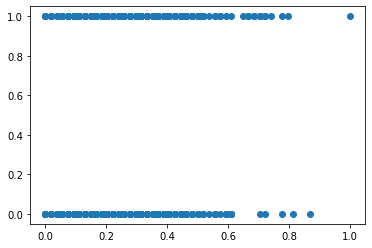

In [214]:
plt.scatter(df['Age'],df['treatment'])

<AxesSubplot:xlabel='tech_company', ylabel='benefits'>

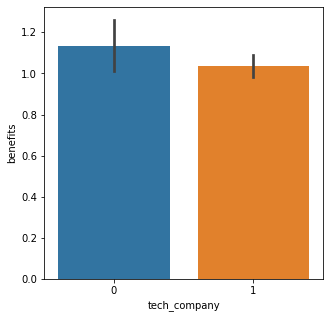

In [215]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='tech_company', y='benefits')

<AxesSubplot:xlabel='tech_company', ylabel='wellness_program'>

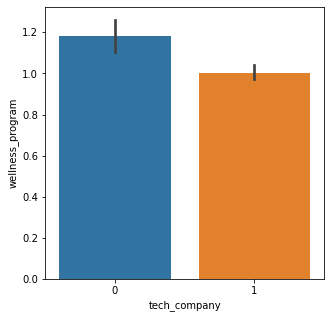

In [216]:
plt.figure(figsize=(5,5));
sns.barplot(data=df, x='tech_company', y='wellness_program')

<AxesSubplot:xlabel='tech_company', ylabel='remote_work'>

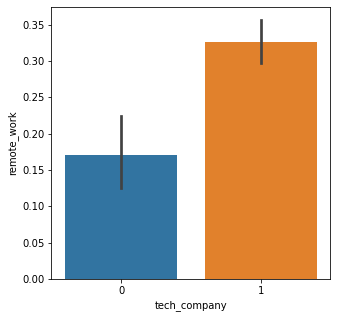

In [217]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='tech_company', y='remote_work')

<AxesSubplot:xlabel='tech_company', ylabel='leave'>

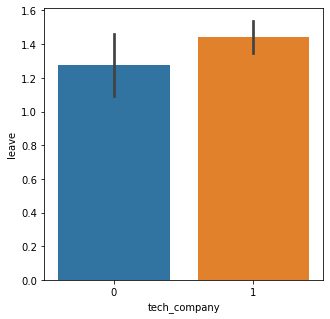

In [218]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='tech_company', y='leave')

<AxesSubplot:xlabel='work_interfere', ylabel='treatment'>

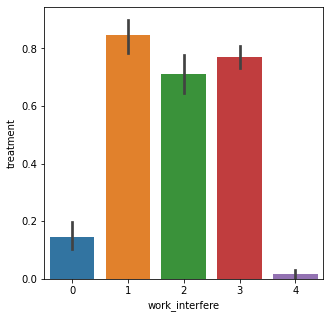

In [219]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='work_interfere', y='treatment')

<AxesSubplot:xlabel='anonymity', ylabel='treatment'>

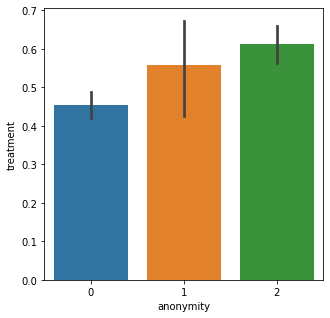

In [220]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='anonymity', y='treatment')

<AxesSubplot:xlabel='phys_health_consequence', ylabel='mental_health_consequence'>

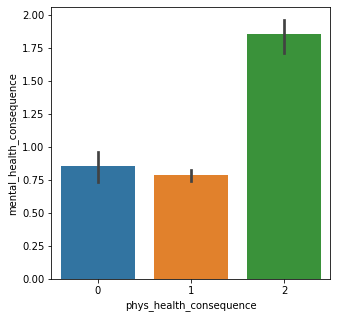

In [221]:
plt.figure(figsize=(5,5));

sns.barplot(data=df, x='phys_health_consequence', y='mental_health_consequence')

In [270]:
import plotly.express as px

fig = px.violin(df, y="Age", x="treatment", color="Gender", box=True, points="all")
fig.show()

In [223]:
scaler = MinMaxScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [226]:
df.drop(['Country', 'state', 'comments'], axis = 1, inplace = True)
df

KeyError: "['Country' 'state' 'comments'] not found in axis"

In [227]:
x = df.drop(['treatment'], axis = 1)
y = df['treatment']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=1/3,random_state=42)

In [228]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [229]:
from sklearn.metrics import accuracy_score
svc_pred = svc.predict(x_test)
svc_train = svc.predict(x_train)
accuracy_score(y_train, svc_train)

0.8569682151589242

In [230]:
accuracy_score(y_test, svc_pred)

0.7829268292682927

In [231]:
from sklearn.linear_model import LogisticRegression
LL = LogisticRegression()
LL.fit(x_train, y_train)

LogisticRegression()

In [232]:
LL_pred = LL.predict(x_test)
LL_train = LL.predict(x_train)
accuracy_score(y_train, LL_train)

0.7286063569682152

In [233]:
accuracy_score(y_test, LL_pred)

0.724390243902439

In [234]:
from sklearn import metrics
metrics.confusion_matrix(y_test, LL_pred)

array([[153,  54],
       [ 59, 144]], dtype=int64)

In [235]:
metrics.confusion_matrix(y_train, LL_train)

array([[290, 108],
       [114, 306]], dtype=int64)

In [236]:
metrics.recall_score(y_test, LL_pred)

0.7093596059113301

In [237]:
metrics.recall_score(y_train, LL_train)

0.7285714285714285

In [238]:
metrics.precision_score(y_test, LL_pred)

0.7272727272727273

In [239]:
metrics.precision_score(y_train, LL_train)

0.7391304347826086

In [240]:
metrics.mean_squared_error(y_train, LL_train)

0.2713936430317848

In [241]:
metrics.mean_squared_error(y_test, LL_pred)

0.275609756097561

In [242]:
print('f1_score_test = ', f1_score(y_test, LL_pred))
print('f1_score_test = ', f1_score(y_train, LL_train))

f1_score_test =  0.7182044887780549
f1_score_test =  0.7338129496402879


# LOGISITIC REGRESIION MODEL  


In [243]:
LL_lib = LogisticRegression(solver = 'liblinear')
LL_lib.fit(x_train, y_train)
LL_pred_lib = LL_lib.predict(x_test)
LL_train_lib = LL_lib.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, LL_train_lib))
print('accuracy_test = ', accuracy_score(y_test, LL_pred_lib))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, LL_train_lib))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, LL_pred_lib))
print('recall_train = ', metrics.recall_score(y_train, LL_train_lib))
print('recall_test = ', metrics.recall_score(y_test, LL_pred_lib))
print('precision_train = ', metrics.precision_score(y_train, LL_train_lib))
print('precision_test = ', metrics.precision_score(y_test, LL_pred_lib))
print('mse_train = ', metrics.mean_squared_error(y_train, LL_train_lib))
print('mse_test = ', metrics.mean_squared_error(y_test, LL_pred_lib))
print('f1_score_test = ', f1_score(y_test, LL_pred_lib))
print('f1_score_test = ', f1_score(y_train, LL_train_lib))

accuracy_train =  0.7224938875305623
accuracy_test =  0.7317073170731707
confusion_matrix_train =  [[283 115]
 [112 308]]
confusion_matrix_test =  [[156  51]
 [ 59 144]]
recall_train =  0.7333333333333333
recall_test =  0.7093596059113301
precision_train =  0.7281323877068558
precision_test =  0.7384615384615385
mse_train =  0.2775061124694376
mse_test =  0.2682926829268293
f1_score_test =  0.7236180904522613
f1_score_test =  0.730723606168446


# KNN MODEL WITH 27 NEIGHBOR

In [244]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 27)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_train = knn.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, knn_train))
print('accuracy_test = ', accuracy_score(y_test, knn_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, knn_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, knn_pred))
print('recall_train = ', metrics.recall_score(y_train, knn_train))
print('recall_test = ', metrics.recall_score(y_test, knn_pred))
print('precision_train = ', metrics.precision_score(y_train, knn_train))
print('precision_test = ', metrics.precision_score(y_test, knn_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, knn_train))
print('mse_test = ', metrics.mean_squared_error(y_test, knn_pred))
print('score_test = ', knn.score(x_test, y_test))
print('score_test = ', knn.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, knn_pred))
print('f1_score_test = ', f1_score(y_train, knn_train))

accuracy_train =  0.7762836185819071
accuracy_test =  0.697560975609756
confusion_matrix_train =  [[291 107]
 [ 76 344]]
confusion_matrix_test =  [[123  84]
 [ 40 163]]
recall_train =  0.819047619047619
recall_test =  0.8029556650246306
precision_train =  0.7627494456762749
precision_test =  0.659919028340081
mse_train =  0.2237163814180929
mse_test =  0.3024390243902439
score_test =  0.697560975609756
score_test =  0.7762836185819071
f1_score_test =  0.7244444444444443
f1_score_test =  0.7898966704936854


# KNN WITH 5 NEIGHBORS

In [245]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn5.fit(x_train, y_train)
knn5_pred = knn5.predict(x_test)
knn5_train = knn5.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, knn5_train))
print('accuracy_test = ', accuracy_score(y_test, knn5_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, knn5_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, knn5_pred))
print('recall_train = ', metrics.recall_score(y_train, knn5_train))
print('recall_test = ', metrics.recall_score(y_test, knn5_pred))
print('precision_train = ', metrics.precision_score(y_train, knn5_train))
print('precision_test = ', metrics.precision_score(y_test, knn5_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, knn5_train))
print('mse_test = ', metrics.mean_squared_error(y_test, knn5_pred))
print('score_test = ', knn5.score(x_test, y_test))
print('score_test = ', knn5.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, knn5_pred))
print('f1_score_test = ', f1_score(y_train, knn5_train))

accuracy_train =  0.8300733496332519
accuracy_test =  0.675609756097561
confusion_matrix_train =  [[328  70]
 [ 69 351]]
confusion_matrix_test =  [[131  76]
 [ 57 146]]
recall_train =  0.8357142857142857
recall_test =  0.7192118226600985
precision_train =  0.833729216152019
precision_test =  0.6576576576576577
mse_train =  0.16992665036674817
mse_test =  0.32439024390243903
score_test =  0.675609756097561
score_test =  0.8300733496332519
f1_score_test =  0.6870588235294117
f1_score_test =  0.8347205707491082


# SVM KERNEL LINEAR MODEL

In [246]:
svm = SVC(kernel = 'linear')
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_train = svm.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, svm_train))
print('accuracy_test = ', accuracy_score(y_test, svm_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, svm_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, svm_pred))
print('recall_train = ', metrics.recall_score(y_train, svm_train))
print('recall_test = ', metrics.recall_score(y_test, svm_pred))
print('precision_train = ', metrics.precision_score(y_train, svm_train))
print('precision_test = ', metrics.precision_score(y_test, svm_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, svm_train))
print('mse_test = ', metrics.mean_squared_error(y_test, svm_pred))
print('f1_score_test = ', f1_score(y_test, svm_pred))
print('f1_score_test = ', f1_score(y_train, svm_train))

accuracy_train =  0.7237163814180929
accuracy_test =  0.7292682926829268
confusion_matrix_train =  [[287 111]
 [115 305]]
confusion_matrix_test =  [[157  50]
 [ 61 142]]
recall_train =  0.7261904761904762
recall_test =  0.6995073891625616
precision_train =  0.7331730769230769
precision_test =  0.7395833333333334
mse_train =  0.2762836185819071
mse_test =  0.2707317073170732
f1_score_test =  0.718987341772152
f1_score_test =  0.7296650717703349


# SVM KERNEL POLYNOMIAL MODEL

In [247]:
svm_poly = SVC(kernel = 'poly')
svm_poly.fit(x_train, y_train)
svm_pred_poly = svm_poly.predict(x_test)
svm_train_poly = svm_poly.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, svm_train_poly))
print('accuracy_test = ', accuracy_score(y_test, svm_pred_poly))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, svm_train_poly))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, svm_pred_poly))
print('recall_train = ', metrics.recall_score(y_train, svm_train_poly))
print('recall_test = ', metrics.recall_score(y_test, svm_pred_poly))
print('precision_train = ', metrics.precision_score(y_train, svm_train_poly))
print('precision_test = ', metrics.precision_score(y_test, svm_pred_poly))
print('mse_train = ', metrics.mean_squared_error(y_train, svm_train_poly))
print('mse_test = ', metrics.mean_squared_error(y_test, svm_pred_poly))
print('f1_score_test = ', f1_score(y_test, svm_pred_poly))
print('f1_score_test = ', f1_score(y_train, svm_train_poly))

accuracy_train =  0.8569682151589242
accuracy_test =  0.7341463414634146
confusion_matrix_train =  [[326  72]
 [ 45 375]]
confusion_matrix_test =  [[137  70]
 [ 39 164]]
recall_train =  0.8928571428571429
recall_test =  0.8078817733990148
precision_train =  0.8389261744966443
precision_test =  0.7008547008547008
mse_train =  0.1430317848410758
mse_test =  0.2658536585365854
f1_score_test =  0.7505720823798626
f1_score_test =  0.8650519031141869


# SVM KERNEL SIGMOID MODEL

In [248]:
svm_sigmoid = SVC(kernel = 'sigmoid')
svm_sigmoid.fit(x_train, y_train)
svm_pred_sigmoid = svm_sigmoid.predict(x_test)
svm_train_sigmoid = svm_sigmoid.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, svm_train_sigmoid))
print('accuracy_test = ', accuracy_score(y_test, svm_pred_sigmoid))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, svm_train_sigmoid))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, svm_pred_sigmoid))
print('recall_train = ', metrics.recall_score(y_train, svm_train_sigmoid))
print('recall_test = ', metrics.recall_score(y_test, svm_pred_sigmoid))
print('precision_train = ', metrics.precision_score(y_train, svm_train_sigmoid))
print('precision_test = ', metrics.precision_score(y_test, svm_pred_sigmoid))
print('mse_train = ', metrics.mean_squared_error(y_train, svm_train_sigmoid))
print('mse_test = ', metrics.mean_squared_error(y_test, svm_pred_sigmoid))
print('f1_score_test = ', f1_score(y_test, svm_pred_sigmoid))
print('f1_score_test = ', f1_score(y_train, svm_train_sigmoid))

accuracy_train =  0.49266503667481665
accuracy_test =  0.4975609756097561
confusion_matrix_train =  [[193 205]
 [210 210]]
confusion_matrix_test =  [[103 104]
 [102 101]]
recall_train =  0.5
recall_test =  0.4975369458128079
precision_train =  0.5060240963855421
precision_test =  0.4926829268292683
mse_train =  0.5073349633251834
mse_test =  0.5024390243902439
f1_score_test =  0.49509803921568635
f1_score_test =  0.5029940119760479


# NAIVE BAYES 'GAUESSIAN'

In [249]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.predict(x_test)
print('gnb_train = ', gnb.score(x_train,y_train))
print('gnb_test =', gnb.score(x_test,y_test))

gnb_train =  0.7334963325183375
gnb_test = 0.7048780487804878


# DECISION TREE 

In [250]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier ()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_test)
dtc_train = dtc.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, dtc_train))
print('accuracy_test = ', accuracy_score(y_test, dtc_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, dtc_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, dtc_pred))
print('recall_train = ', metrics.recall_score(y_train, dtc_train))
print('recall_test = ', metrics.recall_score(y_test, dtc_pred))
print('precision_train = ', metrics.precision_score(y_train, dtc_train))
print('precision_test = ', metrics.precision_score(y_test, dtc_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, dtc_train))
print('mse_test = ', metrics.mean_squared_error(y_test, dtc_pred))
print('score_test = ', dtc.score(x_test, y_test))
print('score_test = ', dtc.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, dtc_pred))
print('f1_score_test = ', f1_score(y_train, dtc_train))

accuracy_train =  1.0
accuracy_test =  0.7170731707317073
confusion_matrix_train =  [[398   0]
 [  0 420]]
confusion_matrix_test =  [[149  58]
 [ 58 145]]
recall_train =  1.0
recall_test =  0.7142857142857143
precision_train =  1.0
precision_test =  0.7142857142857143
mse_train =  0.0
mse_test =  0.28292682926829266
score_test =  0.7170731707317073
score_test =  1.0
f1_score_test =  0.7142857142857143
f1_score_test =  1.0


In [251]:
dtc1=DecisionTreeClassifier (max_depth=7, max_features=6)
dtc1.fit(x_train,y_train)
dtc1_pred = dtc1.predict(x_test)
dtc1_train = dtc1.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, dtc1_train))
print('accuracy_test = ', accuracy_score(y_test, dtc1_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, dtc1_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, dtc1_pred))
print('recall_train = ', metrics.recall_score(y_train, dtc1_train))
print('recall_test = ', metrics.recall_score(y_test, dtc1_pred))
print('precision_train = ', metrics.precision_score(y_train, dtc1_train))
print('precision_test = ', metrics.precision_score(y_test, dtc1_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, dtc1_train))
print('mse_test = ', metrics.mean_squared_error(y_test, dtc1_pred))
print('score_test = ', dtc1.score(x_test, y_test))
print('score_test = ', dtc1.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, dtc1_pred))
print('f1_score_test = ', f1_score(y_train, dtc1_train))

accuracy_train =  0.8557457212713936
accuracy_test =  0.7560975609756098
confusion_matrix_train =  [[297 101]
 [ 17 403]]
confusion_matrix_test =  [[126  81]
 [ 19 184]]
recall_train =  0.9595238095238096
recall_test =  0.9064039408866995
precision_train =  0.7996031746031746
precision_test =  0.6943396226415094
mse_train =  0.14425427872860636
mse_test =  0.24390243902439024
score_test =  0.7560975609756098
score_test =  0.8557457212713936
f1_score_test =  0.7863247863247863
f1_score_test =  0.8722943722943725


# ENSEMBLE MODELS 'RANDOM FOREST'

In [252]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_train = rf.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, rf_train))
print('accuracy_test = ', accuracy_score(y_test, rf_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, rf_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, rf_pred))
print('recall_train = ', metrics.recall_score(y_train, rf_train))
print('recall_test = ', metrics.recall_score(y_test, rf_pred))
print('precision_train = ', metrics.precision_score(y_train, rf_train))
print('precision_test = ', metrics.precision_score(y_test, rf_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, rf_train))
print('mse_test = ', metrics.mean_squared_error(y_test, rf_pred))
print('score_test = ', rf.score(x_test, y_test))
print('score_test = ', rf.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, rf_pred))
print('f1_score_test = ', f1_score(y_train, rf_train))

accuracy_train =  1.0
accuracy_test =  0.7780487804878049
confusion_matrix_train =  [[398   0]
 [  0 420]]
confusion_matrix_test =  [[145  62]
 [ 29 174]]
recall_train =  1.0
recall_test =  0.8571428571428571
precision_train =  1.0
precision_test =  0.7372881355932204
mse_train =  0.0
mse_test =  0.22195121951219512
score_test =  0.7780487804878049
score_test =  1.0
f1_score_test =  0.7927107061503418
f1_score_test =  1.0


In [253]:
rf.feature_importances_

array([0.08497497, 0.02291362, 0.01194983, 0.07137517, 0.32059084,
       0.04767973, 0.01836079, 0.01469441, 0.04146792, 0.04805707,
       0.02402303, 0.02660631, 0.02410153, 0.04050761, 0.02997845,
       0.02106845, 0.03119324, 0.02994575, 0.01566465, 0.02518966,
       0.03103609, 0.01862089])

In [254]:
rf1 = RandomForestClassifier(max_depth=7, max_features=6)
rf1.fit(x_train,y_train)
rf1_pred = rf1.predict(x_test)
rf1_train = rf1.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, rf1_train))
print('accuracy_test = ', accuracy_score(y_test, rf1_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, rf1_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, rf1_pred))
print('recall_train = ', metrics.recall_score(y_train, rf1_train))
print('recall_test = ', metrics.recall_score(y_test, rf1_pred))
print('precision_train = ', metrics.precision_score(y_train, rf1_train))
print('precision_test = ', metrics.precision_score(y_test, rf1_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, rf1_train))
print('mse_test = ', metrics.mean_squared_error(y_test, rf1_pred))
print('score_test = ', rf1.score(x_test, y_test))
print('score_test = ', rf1.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, rf1_pred))
print('f1_score_test = ', f1_score(y_train, rf1_train))

accuracy_train =  0.8985330073349633
accuracy_test =  0.7951219512195122
confusion_matrix_train =  [[329  69]
 [ 14 406]]
confusion_matrix_test =  [[139  68]
 [ 16 187]]
recall_train =  0.9666666666666667
recall_test =  0.9211822660098522
precision_train =  0.8547368421052631
precision_test =  0.7333333333333333
mse_train =  0.10146699266503667
mse_test =  0.2048780487804878
score_test =  0.7951219512195122
score_test =  0.8985330073349633
f1_score_test =  0.8165938864628821
f1_score_test =  0.9072625698324022


In [255]:
rf1.feature_importances_

array([0.05595032, 0.02274555, 0.00572078, 0.11560333, 0.47891933,
       0.02757823, 0.00835165, 0.00833652, 0.03804669, 0.04458493,
       0.01457051, 0.01353078, 0.01868421, 0.02363396, 0.0148755 ,
       0.01108446, 0.02254976, 0.01515073, 0.00937691, 0.01554658,
       0.01980505, 0.01535425])

In [256]:
x_train

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
529,0.203704,0,0,0,3,0,0,1,1,0,...,0,0,0,1,1,1,1,1,2,0
977,0.314815,1,0,1,3,0,0,1,1,2,...,2,4,2,2,1,1,1,0,2,1
940,0.148148,0,1,1,3,0,1,1,1,0,...,0,4,0,1,1,2,1,0,2,0
825,0.092593,1,0,1,4,2,1,1,2,2,...,2,0,0,1,0,1,1,1,0,0
813,0.333333,1,0,0,2,5,0,1,2,2,...,2,1,1,1,1,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.425926,1,0,0,2,5,0,1,2,2,...,0,0,0,0,1,0,1,1,2,1
1095,0.314815,1,0,0,4,4,0,1,0,1,...,2,0,1,1,0,0,1,1,2,0
1130,0.240741,1,0,0,0,1,0,1,2,0,...,0,0,0,2,1,0,1,1,2,0
860,0.240741,1,0,0,2,4,0,1,0,1,...,0,0,1,1,1,2,1,1,0,0


# XGBOOST MODEL

In [257]:
from xgboost import XGBClassifier

In [258]:
xgb= XGBClassifier(objective="binary:logistic", n_estimators=20, random_state=42,max_depth=6, learning_rate=0.3, use_label_encoder=False)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_train = xgb.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, xgb_train))
print('accuracy_test = ', accuracy_score(y_test, xgb_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, xgb_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, xgb_pred))
print('recall_train = ', metrics.recall_score(y_train, xgb_train))
print('recall_test = ', metrics.recall_score(y_test, xgb_pred))
print('precision_train = ', metrics.precision_score(y_train, xgb_train))
print('precision_test = ', metrics.precision_score(y_test, xgb_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, xgb_train))
print('mse_test = ', metrics.mean_squared_error(y_test, xgb_pred))
print('score_test = ', xgb.score(x_test, y_test))
print('score_test = ', xgb.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, xgb_pred))
print('f1_score_test = ', f1_score(y_train, xgb_train))

[16:57:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_train =  0.9498777506112469
accuracy_test =  0.7634146341463415
confusion_matrix_train =  [[367  31]
 [ 10 410]]
confusion_matrix_test =  [[143  64]
 [ 33 170]]
recall_train =  0.9761904761904762
recall_test =  0.8374384236453202
precision_train =  0.9297052154195011
precision_test =  0.7264957264957265
mse_train =  0.05012224938875306
mse_test =  0.23658536585365852
score_test =  0.7634146341463415
score_test =  0.9498777506112469
f1_score_test =  0.7780320366132722
f1_score_test =  0.9523809523809523


# ADABOOST MODEL

In [259]:
from sklearn.ensemble import AdaBoostClassifier

In [260]:
abc = AdaBoostClassifier(n_estimators=7, learning_rate=0.6)
abc.fit(x_train,y_train)
abc_pred = abc.predict(x_test)
abc_train = abc.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, abc_train))
print('accuracy_test = ', accuracy_score(y_test, abc_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, abc_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, abc_pred))
print('recall_train = ', metrics.recall_score(y_train, abc_train))
print('recall_test = ', metrics.recall_score(y_test, abc_pred))
print('precision_train = ', metrics.precision_score(y_train, abc_train))
print('precision_test = ', metrics.precision_score(y_test, abc_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, abc_train))
print('mse_test = ', metrics.mean_squared_error(y_test, abc_pred))
print('score_test = ', abc.score(x_test, y_test))
print('score_test = ', abc.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, abc_pred))
print('f1_score_test = ', f1_score(y_train, abc_train))

accuracy_train =  0.8447432762836186
accuracy_test =  0.8
confusion_matrix_train =  [[292 106]
 [ 21 399]]
confusion_matrix_test =  [[138  69]
 [ 13 190]]
recall_train =  0.95
recall_test =  0.9359605911330049
precision_train =  0.7900990099009901
precision_test =  0.7335907335907336
mse_train =  0.1552567237163814
mse_test =  0.2
score_test =  0.8
score_test =  0.8447432762836186
f1_score_test =  0.8225108225108225
f1_score_test =  0.8627027027027027


In [261]:
from sklearn.ensemble import VotingClassifier

In [262]:
VC = VotingClassifier(estimators=[('rf',rf),('dtc',dtc)])
VC.fit(x_train,y_train)
VC_pred = VC.predict(x_test)
VC_train = VC.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, VC_train))
print('accuracy_test = ', accuracy_score(y_test, VC_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, VC_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, VC_pred))
print('recall_train = ', metrics.recall_score(y_train, VC_train))
print('recall_test = ', metrics.recall_score(y_test, VC_pred))
print('precision_train = ', metrics.precision_score(y_train, VC_train))
print('precision_test = ', metrics.precision_score(y_test, VC_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, VC_train))
print('mse_test = ', metrics.mean_squared_error(y_test, VC_pred))
print('score_test = ', VC.score(x_test, y_test))
print('score_test = ', VC.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, VC_pred))
print('f1_score_test = ', f1_score(y_train, VC_train))

accuracy_train =  1.0
accuracy_test =  0.7268292682926829
confusion_matrix_train =  [[398   0]
 [  0 420]]
confusion_matrix_test =  [[160  47]
 [ 65 138]]
recall_train =  1.0
recall_test =  0.6798029556650246
precision_train =  1.0
precision_test =  0.745945945945946
mse_train =  0.0
mse_test =  0.2731707317073171
score_test =  0.7268292682926829
score_test =  1.0
f1_score_test =  0.711340206185567
f1_score_test =  1.0


In [263]:
VC1 = VotingClassifier(estimators=[('rf1',rf1),('dtc1',dtc1)])
VC1.fit(x_train,y_train)
VC1_pred = VC1.predict(x_test)
VC1_train = VC1.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, VC1_train))
print('accuracy_test = ', accuracy_score(y_test, VC1_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, VC1_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, VC1_pred))
print('recall_train = ', metrics.recall_score(y_train, VC1_train))
print('recall_test = ', metrics.recall_score(y_test, VC1_pred))
print('precision_train = ', metrics.precision_score(y_train, VC1_train))
print('precision_test = ', metrics.precision_score(y_test, VC1_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, VC1_train))
print('mse_test = ', metrics.mean_squared_error(y_test, VC1_pred))
print('score_test = ', VC1.score(x_test, y_test))
print('score_test = ', VC1.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, VC1_pred))
print('f1_score_test = ', f1_score(y_train, VC1_train))

accuracy_train =  0.89119804400978
accuracy_test =  0.7560975609756098
confusion_matrix_train =  [[346  52]
 [ 37 383]]
confusion_matrix_test =  [[148  59]
 [ 41 162]]
recall_train =  0.9119047619047619
recall_test =  0.7980295566502463
precision_train =  0.8804597701149425
precision_test =  0.7330316742081447
mse_train =  0.10880195599022005
mse_test =  0.24390243902439024
score_test =  0.7560975609756098
score_test =  0.89119804400978
f1_score_test =  0.7641509433962265
f1_score_test =  0.895906432748538


In [264]:
VC2 = VotingClassifier(estimators=[('rf1',rf1),('dtc',dtc)])
VC2.fit(x_train,y_train)
VC2_pred = VC2.predict(x_test)
VC2_train = VC2.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, VC2_train))
print('accuracy_test = ', accuracy_score(y_test, VC2_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, VC2_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, VC2_pred))
print('recall_train = ', metrics.recall_score(y_train, VC2_train))
print('recall_test = ', metrics.recall_score(y_test, VC2_pred))
print('precision_train = ', metrics.precision_score(y_train, VC2_train))
print('precision_test = ', metrics.precision_score(y_test, VC2_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, VC2_train))
print('mse_test = ', metrics.mean_squared_error(y_test, VC2_pred))
print('score_test = ', VC2.score(x_test, y_test))
print('score_test = ', VC2.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, VC2_pred))
print('f1_score_test = ', f1_score(y_train, VC2_train))

accuracy_train =  0.9792176039119804
accuracy_test =  0.7268292682926829
confusion_matrix_train =  [[398   0]
 [ 17 403]]
confusion_matrix_test =  [[162  45]
 [ 67 136]]
recall_train =  0.9595238095238096
recall_test =  0.6699507389162561
precision_train =  1.0
precision_test =  0.7513812154696132
mse_train =  0.02078239608801956
mse_test =  0.2731707317073171
score_test =  0.7268292682926829
score_test =  0.9792176039119804
f1_score_test =  0.7083333333333333
f1_score_test =  0.9793438639125152


In [265]:
VC3 = VotingClassifier(estimators=[('rf',rf),('dtc1',dtc1)])
VC3.fit(x_train,y_train)
VC3_pred = VC3.predict(x_test)
VC3_train = VC3.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, VC3_train))
print('accuracy_test = ', accuracy_score(y_test, VC3_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, VC3_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, VC3_pred))
print('recall_train = ', metrics.recall_score(y_train, VC3_train))
print('recall_test = ', metrics.recall_score(y_test, VC3_pred))
print('precision_train = ', metrics.precision_score(y_train, VC3_train))
print('precision_test = ', metrics.precision_score(y_test, VC3_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, VC3_train))
print('mse_test = ', metrics.mean_squared_error(y_test, VC3_pred))
print('score_test = ', VC3.score(x_test, y_test))
print('score_test = ', VC3.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, VC3_pred))
print('f1_score_test = ', f1_score(y_train, VC3_train))

accuracy_train =  0.9168704156479217
accuracy_test =  0.7682926829268293
confusion_matrix_train =  [[398   0]
 [ 68 352]]
confusion_matrix_test =  [[165  42]
 [ 53 150]]
recall_train =  0.8380952380952381
recall_test =  0.7389162561576355
precision_train =  1.0
precision_test =  0.78125
mse_train =  0.08312958435207823
mse_test =  0.23170731707317074
score_test =  0.7682926829268293
score_test =  0.9168704156479217
f1_score_test =  0.7594936708860759
f1_score_test =  0.9119170984455958


In [266]:
VC4 = VotingClassifier(estimators=[('rf',rf),('dtc',dtc),('rf1',rf1),('dtc1',dtc1),('svc',svc),('LL',LL),('LL_lib',LL_lib),('knn',knn),('knn5',knn5),('svm',svm),('svm_poly',svm_poly),('svm_sigmoid',svm_sigmoid),('gnb',gnb),('xgb',xgb),('abc',abc)])
VC4.fit(x_train,y_train)
VC4_pred = VC4.predict(x_test)
VC4_train = VC4.predict(x_train)
print('accuracy_train = ', accuracy_score(y_train, VC4_train))
print('accuracy_test = ', accuracy_score(y_test, VC4_pred))
print('confusion_matrix_train = ', metrics.confusion_matrix(y_train, VC4_train))
print('confusion_matrix_test = ', metrics.confusion_matrix(y_test, VC4_pred))
print('recall_train = ', metrics.recall_score(y_train, VC4_train))
print('recall_test = ', metrics.recall_score(y_test, VC4_pred))
print('precision_train = ', metrics.precision_score(y_train, VC4_train))
print('precision_test = ', metrics.precision_score(y_test, VC4_pred))
print('mse_train = ', metrics.mean_squared_error(y_train, VC4_train))
print('mse_test = ', metrics.mean_squared_error(y_test, VC4_pred))
print('score_test = ', VC4.score(x_test, y_test))
print('score_test = ', VC4.score(x_train, y_train))
print('f1_score_test = ', f1_score(y_test, VC4_pred))
print('f1_score_test = ', f1_score(y_train, VC4_train))

[16:57:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy_train =  0.9095354523227384
accuracy_test =  0.7829268292682927
confusion_matrix_train =  [[346  52]
 [ 22 398]]
confusion_matrix_test =  [[148  59]
 [ 30 173]]
recall_train =  0.9476190476190476
recall_test =  0.8522167487684729
precision_train =  0.8844444444444445
precision_test =  0.7456896551724138
mse_train =  0.09046454767726161
mse_test =  0.21707317073170732
score_test =  0.7829268292682927
score_test =  0.9095354523227384
f1_score_test =  0.7954022988505748
f1_score_test =  0.9149425287356323


In [267]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([('reducer', PCA(n_components = 3)), ('classifier', RandomForestClassifier())])
pipe.fit(x_train, y_train)
pipe.steps

[('reducer', PCA(n_components=3)), ('classifier', RandomForestClassifier())]

In [268]:
pipe.score(x_test, y_test)

0.7804878048780488